In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_count = pd.read_csv("results/mobilenet/mnist_count.csv")
df_count

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,0.879269,0.462076,0.833333,76.269981,53,1155840000
1,1,2,0.447247,0.415317,0.856111,77.646892,46,1155840000
2,1,3,0.386744,0.375639,0.862111,77.737835,47,1155840000
3,1,4,0.352586,0.343059,0.875278,78.501012,41,1155840000
4,1,5,0.329822,0.346819,0.871389,76.379450,48,1155840000
...,...,...,...,...,...,...,...,...
150,5,27,0.158430,0.365902,0.878444,78.647924,58,1155840000
151,5,28,0.162088,0.348886,0.882833,77.894259,45,1155840000
152,5,29,0.154093,0.356529,0.882833,79.918681,43,1155840000
153,5,30,0.146752,0.362705,0.885278,75.114373,43,1155840000


In [5]:
df_original = pd.read_csv("results/mobilenet/mnist_original.csv")
df_original

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,0.854155,0.455962,0.838444,39.803574,0,0
1,1,2,0.442628,0.390645,0.859500,47.591414,0,0
2,1,3,0.376477,0.361917,0.869222,48.183938,0,0
3,1,4,0.339196,0.345444,0.873889,39.064431,0,0
4,1,5,0.318704,0.337758,0.878611,42.081585,0,0
...,...,...,...,...,...,...,...,...
150,5,27,0.150887,0.346904,0.886556,58.032932,0,0
151,5,28,0.147400,0.355266,0.885000,51.136095,0,0
152,5,29,0.146472,0.352545,0.884111,56.046104,0,0
153,5,30,0.142108,0.373669,0.883500,56.903535,0,0


In [6]:
df_diff = pd.read_csv("results/mobilenet/mnist_diff.csv")
df_diff

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,0.832898,0.501164,0.814833,50.101430,0,0
1,1,2,0.440344,0.403535,0.856889,47.843561,0,0
2,1,3,0.376768,0.377390,0.864667,44.894636,0,0
3,1,4,0.344461,0.351569,0.872833,49.464895,0,0
4,1,5,0.315556,0.350353,0.873167,56.158957,0,0
...,...,...,...,...,...,...,...,...
150,5,27,0.140728,0.380260,0.883111,45.751179,0,0
151,5,28,0.134231,0.391230,0.879389,46.958967,0,0
152,5,29,0.130462,0.377925,0.885556,51.733150,0,0
153,5,30,0.122090,0.382753,0.885167,52.239309,0,0


In [7]:
# splitting training and test
df_count_train = df_count[df_count["epoch"] != -1]
df_count_test = df_count[df_count["epoch"] == -1]
df_original_train = df_original[df_original["epoch"] != -1]
df_original_test = df_original[df_original["epoch"] == -1]
df_diff_train = df_diff[df_diff["epoch"] != -1]
df_diff_test = df_diff[df_diff["epoch"] == -1]

In [8]:
# add relu proportion
df_count_train["relu_proportion"] = df_count_train["zero_relu_call"] / df_count_train["total_relu_call"]
df_original_train["relu_proportion"] = df_original_train["zero_relu_call"] / df_original_train["total_relu_call"]
df_diff_train["relu_proportion"] = df_diff_train["zero_relu_call"] / df_diff_train["total_relu_call"]

/tmp/ipykernel_3148/561248041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_train["relu_proportion"] = df_count_train["zero_relu_call"] / df_count_train["total_relu_call"]
/tmp/ipykernel_3148/561248041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original_train["relu_proportion"] = df_original_train["zero_relu_call"] / df_original_train["total_relu_call"]
/tmp/ipykernel_3148/561248041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

## Frequência da ReLU

In [9]:
temp = df_count_train.groupby("execution").sum()
relu_proportion = temp["zero_relu_call"] / temp["total_relu_call"]
print(f"Proporção Média da ReLU: {relu_proportion.mean()}    1/{round(1/relu_proportion.mean()):_}")

Proporção Média da ReLU: 4.6367432631967516e-08    1/21_566_862


<Axes: xlabel='epoch', ylabel='relu_proportion'>

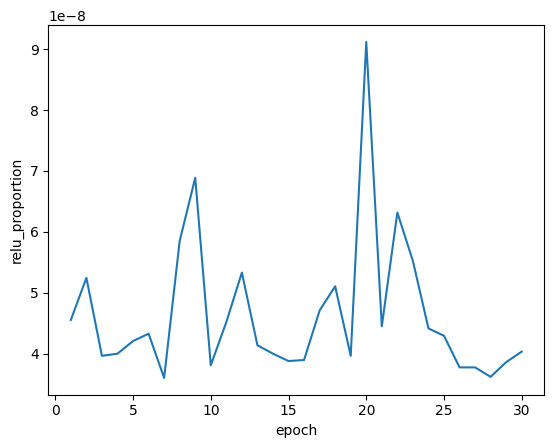

In [10]:
df_train_avg = df_count_train.groupby("epoch").mean()
sns.lineplot(data=df_train_avg, x="epoch", y="relu_proportion")

## Eficiência do Modelo

In [11]:
print(f"Acurácia (teste) média: {round(100*df_count_test['val_acc'].mean(), 2)}%")

Acurácia (teste) média: 87.92%


<Axes: xlabel='epoch', ylabel='train_loss'>

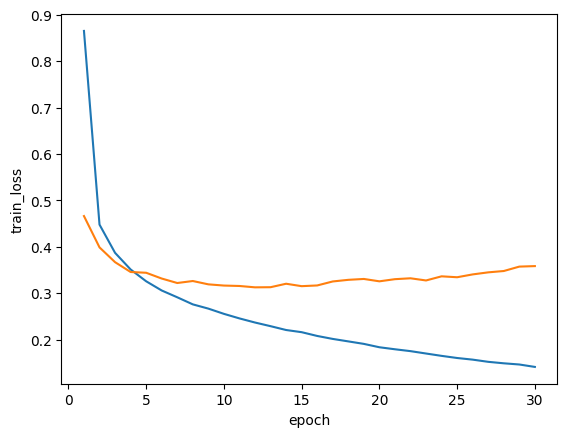

In [12]:
sns.lineplot(data=df_train_avg, x="epoch", y="train_loss")
sns.lineplot(data=df_train_avg, x="epoch", y="val_loss")

In [13]:
df_train_sum = df_count_train.groupby("execution").sum()
seconds_avg = round(df_train_sum["time"].mean())
minutes_avg = seconds_avg // 60
seconds_avg = seconds_avg % 60
print(f"Tempo médio de treino: {minutes_avg}:{seconds_avg}")

Tempo médio de treino: 39:18


## Comparando com funções build-in

In [14]:
# acurácia média
acc_test = df_count_test["val_acc"].mean()
acc_test_original = df_original_test["val_acc"].mean()
diff = (acc_test - acc_test_original) / acc_test_original
print(acc_test, acc_test_original, diff)

0.8791799999999999 0.8805200000000001 -0.0015218280107211985


<Axes: xlabel='epoch', ylabel='train_loss'>

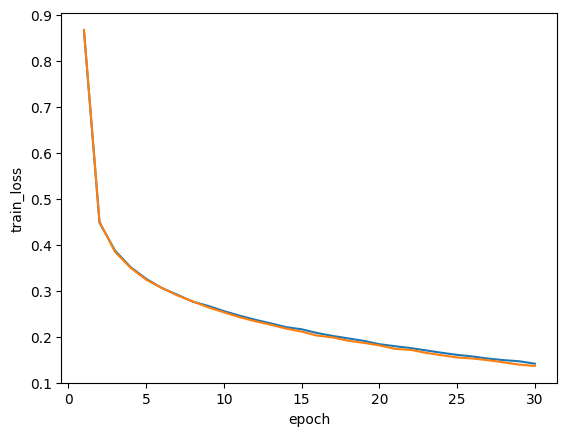

In [15]:
df_train_avg = df_count_train.groupby("epoch").mean()
df_train_avg_original = df_original_train.groupby("epoch").mean()
sns.lineplot(data=df_train_avg, x="epoch", y="train_loss")
sns.lineplot(data=df_train_avg_original, x="epoch", y="train_loss")

<Axes: xlabel='epoch', ylabel='val_loss'>

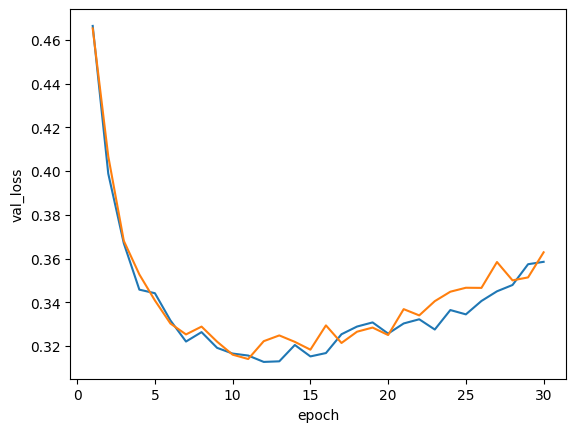

In [16]:
sns.lineplot(data=df_train_avg, x="epoch", y="val_loss")
sns.lineplot(data=df_train_avg_original, x="epoch", y="val_loss")

<Axes: xlabel='epoch', ylabel='value'>

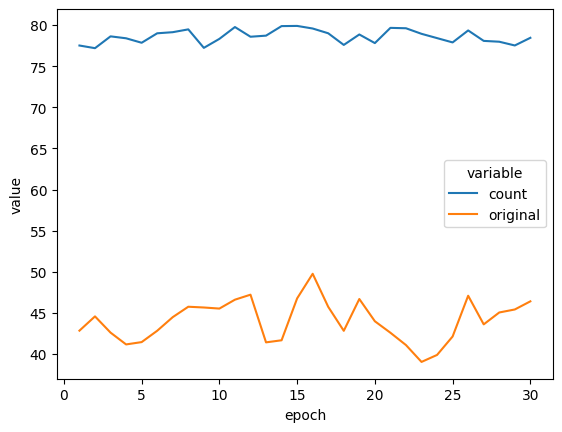

In [17]:
temp = pd.DataFrame()
temp["count"] = df_train_avg["time"]
temp["original"] = df_train_avg_original["time"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
sns.lineplot(data=temp, x="epoch", y="value", hue="variable")

## Comparando com funções diferenciáveis

In [18]:
df_train_avg_diff = df_diff_train.groupby("epoch").mean()
df_train_avg_diff

,execution,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call,relu_proportion
epoch,,,,,,,,
1,3.0,0.840575,0.466988,0.829844,42.864914,0.0,0.0,NaN
2,3.0,0.439885,0.407585,0.853900,44.160719,0.0,0.0,NaN
3,3.0,0.377637,0.367212,0.866733,44.785355,0.0,0.0,NaN
4,3.0,0.341969,0.347233,0.874600,45.702221,0.0,0.0,NaN
5,3.0,0.315976,0.343635,0.874722,48.006769,0.0,0.0,NaN
6,3.0,0.296366,0.331272,0.880067,43.824344,0.0,0.0,NaN
7,3.0,0.281253,0.339577,0.876111,46.020167,0.0,0.0,NaN
8,3.0,0.267182,0.330742,0.878544,48.905545,0.0,0.0,NaN
9,3.0,0.253915,0.326997,0.880778,49.465932,0.0,0.0,NaN


Text(0.5, 1.0, 'Tempo por Epoca')

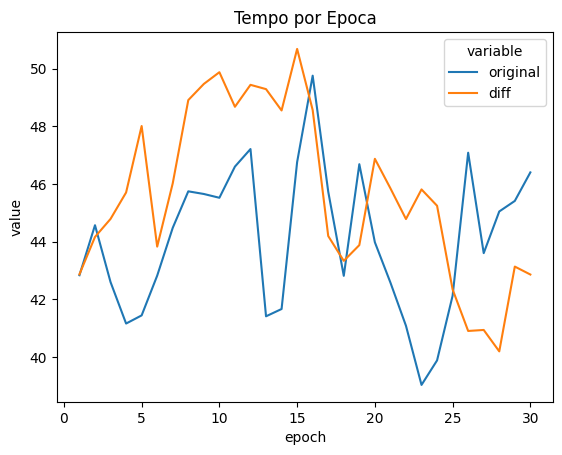

In [19]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["time"]
temp["diff"] = df_train_avg_diff["time"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Tempo por Epoca")

In [30]:
# tempo total de treino
time_original = round(df_train_avg_original["time"].sum())
time_diff = round(df_train_avg_diff["time"].sum())

print(f"Tempo total de treino (não diff): {time_original//60:02}:{time_original%60:02}")
print(f"Tempo total de treino (diff): {time_diff//60:02}:{time_diff%60:02}")
print(f"Diferença: {round(100*(time_diff - time_original) / time_original, 2)}%")

Tempo total de treino (não diff): 22:02
Tempo total de treino (diff): 22:49
Diferença: 3.56%


Text(0.5, 1.0, 'Loss (Treino) por Epoca')

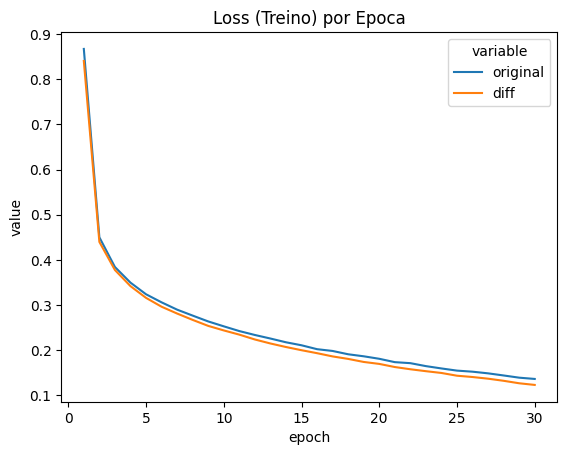

In [20]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["train_loss"]
temp["diff"] = df_train_avg_diff["train_loss"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Loss (Treino) por Epoca")

Text(0.5, 1.0, 'Loss (Validacao) por Epoca')

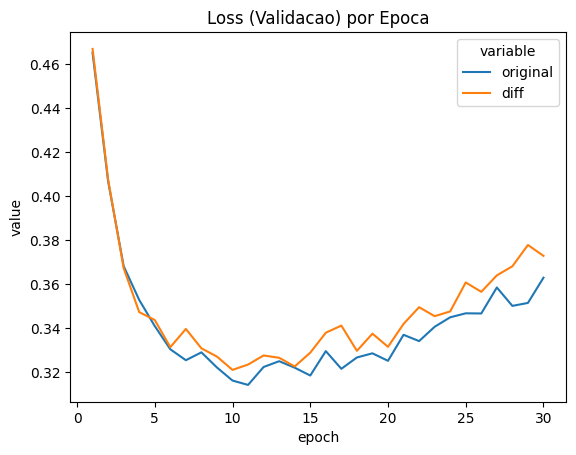

In [21]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["val_loss"]
temp["diff"] = df_train_avg_diff["val_loss"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Loss (Validacao) por Epoca")

Text(0.5, 1.0, 'Acurácia (Validacao) por Epoca')

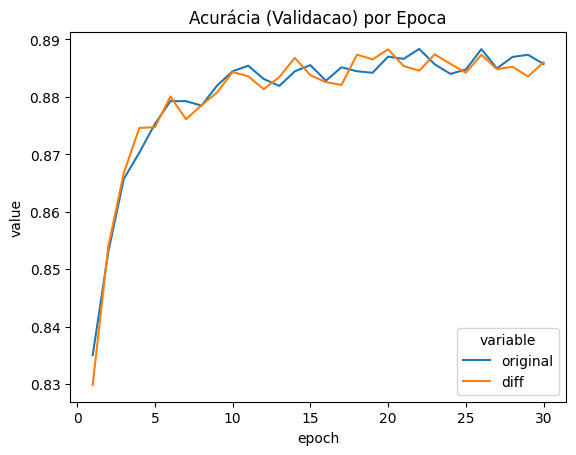

In [22]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["val_acc"]
temp["diff"] = df_train_avg_diff["val_acc"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Acurácia (Validacao) por Epoca")

In [23]:
# melhor época original
df_train_avg_original[df_train_avg_original["val_loss"] == df_train_avg_original["val_loss"].min()]

,execution,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call,relu_proportion
epoch,,,,,,,,
11,3.0,0.242453,0.314099,0.885433,46.599799,0.0,0.0,NaN


In [24]:
# melhor época diff
df_train_avg_diff[df_train_avg_diff["val_loss"] == df_train_avg_diff["val_loss"].min()]

,execution,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call,relu_proportion
epoch,,,,,,,,
10,3.0,0.243876,0.32093,0.884333,49.872575,0.0,0.0,NaN


In [47]:
# tempo para chegar na melhor época
epoch_original = df_train_avg_original[df_train_avg_original["val_loss"] == df_train_avg_original["val_loss"].min()].index[0]
epoch_diff = df_train_avg_diff[df_train_avg_diff["val_loss"] == df_train_avg_diff["val_loss"].min()].index[0]

time_original = round(df_train_avg_original.head(epoch_original)["time"].sum())
time_diff = round(df_train_avg_diff.head(epoch_diff)["time"].sum())

print(f"Tempo de treino até melhor época (não diff): {time_original//60:02}:{time_original%60:02}")
print(f"Tempo de treino até melhor época (diff): {time_diff//60:02}:{time_diff%60:02}")
print(f"Diferença: {round(100*(time_diff - time_original) / time_original, 2)}%")

Tempo de treino até melhor época (não diff): 08:03
Tempo de treino até melhor época (diff): 07:44
Diferença: -3.93%
